<a href="https://colab.research.google.com/github/upadhyan/STAT-598-Work/blob/main/STAT_598_Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as  np
import matplotlib.pyplot as plt
import cvxpy as cvx
import scipy.stats as stats


#Exercise 1
## Part a)
The  hypothesis that fits the training set the most is the one is $h_1$ which would result in a $g$ full of black dots. Only $f_8$ agrees with this hypothesis

## Part b)
The  hypothesis that fits the training set the least is the one is $h_2$ which would result in a $g$ full of white dots. Only $f_1$ agrees with this hypothesis

## Part c)
$g = [w,b,b,w,b,w,w,b]$. The only function that agrees with this is $f_2$
## Part d)
$g = [w,b,b,w,b,b,b,w]$. The only function that agrees with this is $f_5$
#Exercise 2
## Part a)
$\mu_1 = \mu_{rand}=\mu_{min}= 0.5$
## Part b)


In [ ]:
N = 100000
results = np.zeros((N,3))
for i in range(N):
  x = np.random.binomial(n=10, p=0.5, size=1000)
  results[i,0] = x[0] / 10
  results[i,1] = x[np.random.randint(1,high = 1000)] /10
  results[i,2] = np.amin(x) / 10
results[:,0]

array([0.5, 0.6, 0.4, ..., 0.5, 0.6, 0.6])

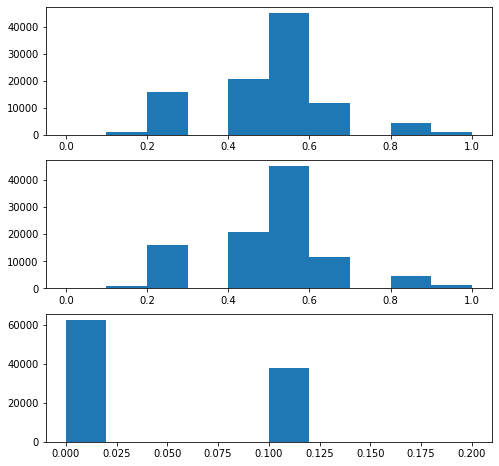

In [ ]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
plt.subplot(3, 1, 1)
plt.hist(results[:,0]);
plt.subplot(3, 1, 2)
plt.hist(results[:,1]);
plt.subplot(3, 1, 3)
plt.hist(results[:,2]);

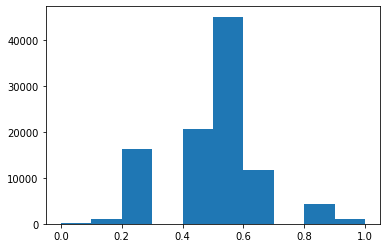

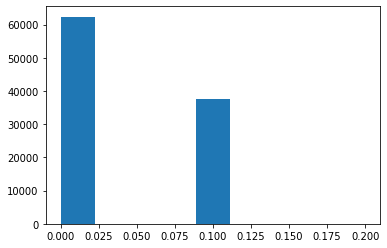

## Part c)

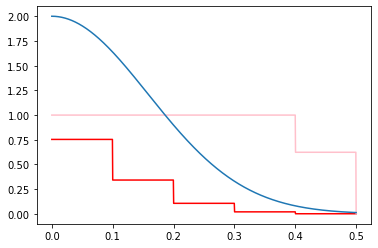

In [ ]:
epsilon = np.linspace(0,0.5,1000)
hoeffding_bound = 2*np.exp(-2*(epsilon**2)*10)
v_u = np.abs(results - 0.5)
comparison = np.zeros((1000,3))
for i in range(1000):
  condition = np.sum(np.where(v_u > epsilon[i], 1, 0), axis = 0) / N
  comparison[i,0] = condition[0] # V_1
  comparison[i,1] = condition[1] # V_rand
  comparison[i,2] = condition[2] # V_min
plt.plot(epsilon,comparison[:,0], c='red'); # V_1
#plt.plot(epsilon,comparison[:,1], c='green'); # V_rand
plt.plot(epsilon, comparison[:,2], c = 'pink') # V_min
plt.plot(epsilon,hoeffding_bound);
plt.show()

# Exercise 3

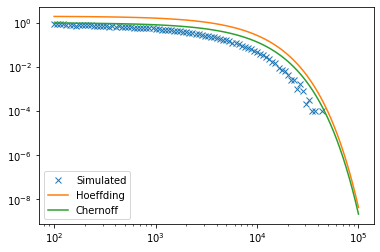

In [ ]:
# Gaussian
p = 0.5
epsilon = 0.01
beta = 1 + (.5 + epsilon)*np.log2(.5+epsilon)+(.5-epsilon)*np.log2(.5-epsilon)
Nset = np.round(np.logspace(2,5,100)).astype(int)
x = np.zeros((10000,Nset.size))
prob_simulate  = np.zeros(100)
prob_chebyshev = np.zeros(100)
prob_hoeffding = np.zeros(100)
for i in range(Nset.size):
  N = Nset[i]
  x[:,i] = stats.binom.rvs(N, p, size=10000)/N
  prob_simulate[i]  = np.mean((np.abs(x[:,i]-p)>epsilon).astype(float))
  prob_hoeffding[i] = 2*np.exp(-2*N*epsilon**2)
  prob_chernoff[i]  = 2**(-beta*N)

simulated = plt.loglog(Nset, prob_simulate,'x', label = 'Simulated')
hoeffding = plt.loglog(Nset, prob_hoeffding, label = 'Hoeffding')
chernoff = plt.loglog(Nset, prob_chernoff, label = "Chernoff")
plt.legend(loc="lower left");
